In [2]:
import pandas as pd
import numpy as np

import random 

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [3]:
options = {'Real bad': 1, 'Normal': 2, 'All good': 3}

heart_rate = []
steps = []
sleep = []

for x in range(10000):
    heart_rate.append(random.choice(list(options.keys())))
    steps.append(random.randint(0, 1000))
    sleep.append(random.randint(5, 8))
    
def verdict(df):
    
    # mean and std
    steps_mean = df.Steps.mean()
    steps_std = df.Steps.std()
    
    sleep_mean = df.Sleep.mean()
    sleep_std = df.Sleep.std()
    
    verdict = []

    for index, row in df.iterrows():
        count = 0
        # heart rate
        count += options[row.HR]

        # steps
        if row.Steps < (steps_mean - 3*steps_std) or row.Steps > (steps_mean + 3*steps_std):
            count += 1
        elif row.Steps > (steps_mean - steps_std) or row.Steps < (steps_mean + steps_std):
            count += 3
        else:
            count += 2

        # sleep
        if row.Sleep < (sleep_mean - 0.5*sleep_std):
            count += 1
        elif row.Sleep > (sleep_mean + 0.5*sleep_std):
            count += 3
        else: 
            count += 2

        if count < 6:
            verdict.append(1)
        elif count > 8:
            verdict.append(3)
        else:
            verdict.append(2)

        # reset
        count = 0
        
    return verdict

In [4]:
df = pd.DataFrame(data = {'HR': heart_rate, 'Steps': steps, 'Sleep': sleep})

# 1 is real bad; 2 is normal; 3 is real good
df['Score'] = verdict(df)

# one hot encoding
dummy = pd.get_dummies(df['HR'], prefix = 'HR')
new_df = pd.merge(left = df, right = dummy, left_index = True, right_index = True)
new_df

,HR,Steps,Sleep,Score,HR_All good,HR_Normal,HR_Real bad
0,Real bad,559,7,2,0,0,1
1,Real bad,293,7,2,0,0,1
2,All good,908,7,2,1,0,0
3,Real bad,835,6,2,0,0,1
4,Normal,660,6,2,0,1,0
...,...,...,...,...,...,...,...
9995,Real bad,441,5,1,0,0,1
9996,Normal,634,5,2,0,1,0
9997,Real bad,731,6,2,0,0,1
9998,All good,580,6,2,1,0,0


In [5]:
X = new_df[['Steps', 'Sleep', 'HR_All good', 'HR_Normal', 'HR_Real bad']]
y = new_df.Score

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

In [6]:
model = DecisionTreeClassifier(max_depth = 2) # anders returned ie altijd 100% --> overfitting
model = model.fit(x_train, y_train)

pred = model.predict(x_test)

print("Accuracy: ", round(accuracy_score(y_test, pred) * 100, 1), '%')

Accuracy:  91.7 %


<AxesSubplot:ylabel='Score'>

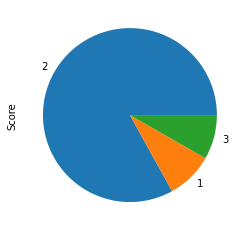

In [9]:
new_df.Score.value_counts().plot(kind = 'pie') # ff checken wat de verdeling is